Marketing and Promotion:
Analyze the data to identify customer segments, travel patterns, and preferences.
Develop targeted marketing campaigns to increase customer acquisition, retention, and loyalty.

### Permasalahan Bisnis
Salah satu permasalahan bisnis yang dapat diangkat dari data ini adalah **mengoptimalkan distribusi armada taksi untuk meningkatkan efisiensi operasi dan pendapatan**. Perusahaan taksi perlu memahami pola permintaan pelanggan, waktu-waktu sibuk, dan area-area dengan permintaan tinggi untuk mengalokasikan sumber daya mereka dengan lebih efektif.

### Analisis Mendalam
1. **Pola Permintaan Berdasarkan Waktu**:
   - Analisis tren waktu penjemputan dan penurunan untuk mengidentifikasi puncak permintaan harian dan mingguan.

2. **Distribusi Penumpang dan Jarak Perjalanan**:
   - Mengidentifikasi lokasi penjemputan dan penurunan yang sering, serta jarak rata-rata perjalanan untuk membantu dalam perencanaan rute.

3. **Jenis Pembayaran dan Pengaruhnya terhadap Pendapatan**:
   - Meninjau proporsi jenis pembayaran (tunai, kartu kredit, dll.) dan dampaknya pada pendapatan, termasuk tip.

4. **Analisis Tarif dan Pendapatan**:
   - Memeriksa tarif rata-rata per mil dan faktor-faktor yang mempengaruhi total pendapatan perjalanan.

5. **Efek Biaya Kemacetan**:
   - Menganalisis bagaimana biaya kemacetan mempengaruhi total biaya perjalanan dan perilaku pelanggan.

1. Pola Permintaan Berdasarkan Waktu

Tujuan: Mengidentifikasi tren waktu puncak dan periode sepi dalam permintaan taksi untuk mengoptimalkan alokasi armada.

Pertanyaan Kunci:
Kapan waktu puncak dan waktu sepi permintaan taksi di sepanjang hari dan minggu?
Apakah ada pola musiman atau harian dalam permintaan?

Kriteria Keberhasilan:
Identifikasi waktu puncak dan periode sepi yang jelas.
Rekomendasi untuk penjadwalan dan alokasi armada yang lebih efisien.

2. Distribusi Penumpang dan Jarak Perjalanan
Tujuan: Menyediakan informasi tentang lokasi penjemputan dan penurunan yang sering serta jarak rata-rata perjalanan untuk perencanaan rute.

Pertanyaan Kunci:
Di mana lokasi penjemputan dan penurunan yang paling sering terjadi?
Berapa jarak rata-rata perjalanan dari titik penjemputan ke titik penurunan?

Kriteria Keberhasilan:
Pemetaan lokasi penjemputan dan penurunan utama.
Penentuan jarak rata-rata perjalanan dan pola distribusi perjalanan.

3. Jenis Pembayaran dan Pengaruhnya terhadap Pendapatan
Tujuan: Menganalisis proporsi jenis pembayaran dan pengaruhnya terhadap total pendapatan serta tips.

Pertanyaan Kunci:
Berapa proporsi setiap jenis pembayaran (tunai, kartu kredit, dll.)?
Bagaimana jenis pembayaran mempengaruhi total pendapatan dan jumlah tip yang diterima?

Kriteria Keberhasilan:
Pemahaman tentang distribusi jenis pembayaran.
Analisis dampak jenis pembayaran terhadap pendapatan total dan tips.

4. Analisis Tarif dan Pendapatan
Tujuan: Mengkaji tarif rata-rata per mil dan faktor-faktor yang mempengaruhi total pendapatan perjalanan.

Pertanyaan Kunci:
Berapa tarif rata-rata per mil?
Apa faktor-faktor utama yang mempengaruhi total pendapatan perjalanan?

Kriteria Keberhasilan:
Penetapan tarif rata-rata per mil dan faktor-faktor pengaruhnya.
Rekomendasi untuk penyesuaian tarif guna meningkatkan pendapatan.

5. Efek Biaya Kemacetan
Tujuan: Menilai bagaimana biaya kemacetan mempengaruhi total biaya perjalanan dan perilaku pelanggan.

Pertanyaan Kunci:
Bagaimana kemacetan mempengaruhi biaya perjalanan?
Apakah ada hubungan antara biaya kemacetan dan kepuasan pelanggan?

Kriteria Keberhasilan:
Identifikasi dampak kemacetan pada biaya perjalanan.
Rekomendasi untuk mengurangi dampak kemacetan pada biaya dan kepuasan pelanggan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_feb = pd.read_parquet('green_tripdata_2023-02.parquet')
df_mar = pd.read_parquet('green_tripdata_2023-03.parquet')
df_feb.to_csv('NYC TLC Trip Record_Feb.csv', index=False)
df_mar.to_csv('NYC TLC Trip Record_Mar.csv', index=False)

In [3]:
df_jan = pd.read_csv('NYC TLC Trip Record_Jan.csv')
df_feb = pd.read_csv('NYC TLC Trip Record_Feb.csv')
df_mar = pd.read_csv('NYC TLC Trip Record_Mar.csv')
locID = pd.read_csv('taxi_zone_lookup.csv')

In [4]:
df = pd.concat([df_jan, df_feb, df_mar], ignore_index=False)

In [5]:
df = df.merge(locID, left_on='PULocationID', right_on='LocationID', suffixes=('_drop', '_pick'))
df = df.merge(locID, left_on='DOLocationID', right_on='LocationID', suffixes=('_pick', '_drop'))
df = df.drop(['ehail_fee','LocationID_drop', 'LocationID_pick'], axis=1)

<Axes: >

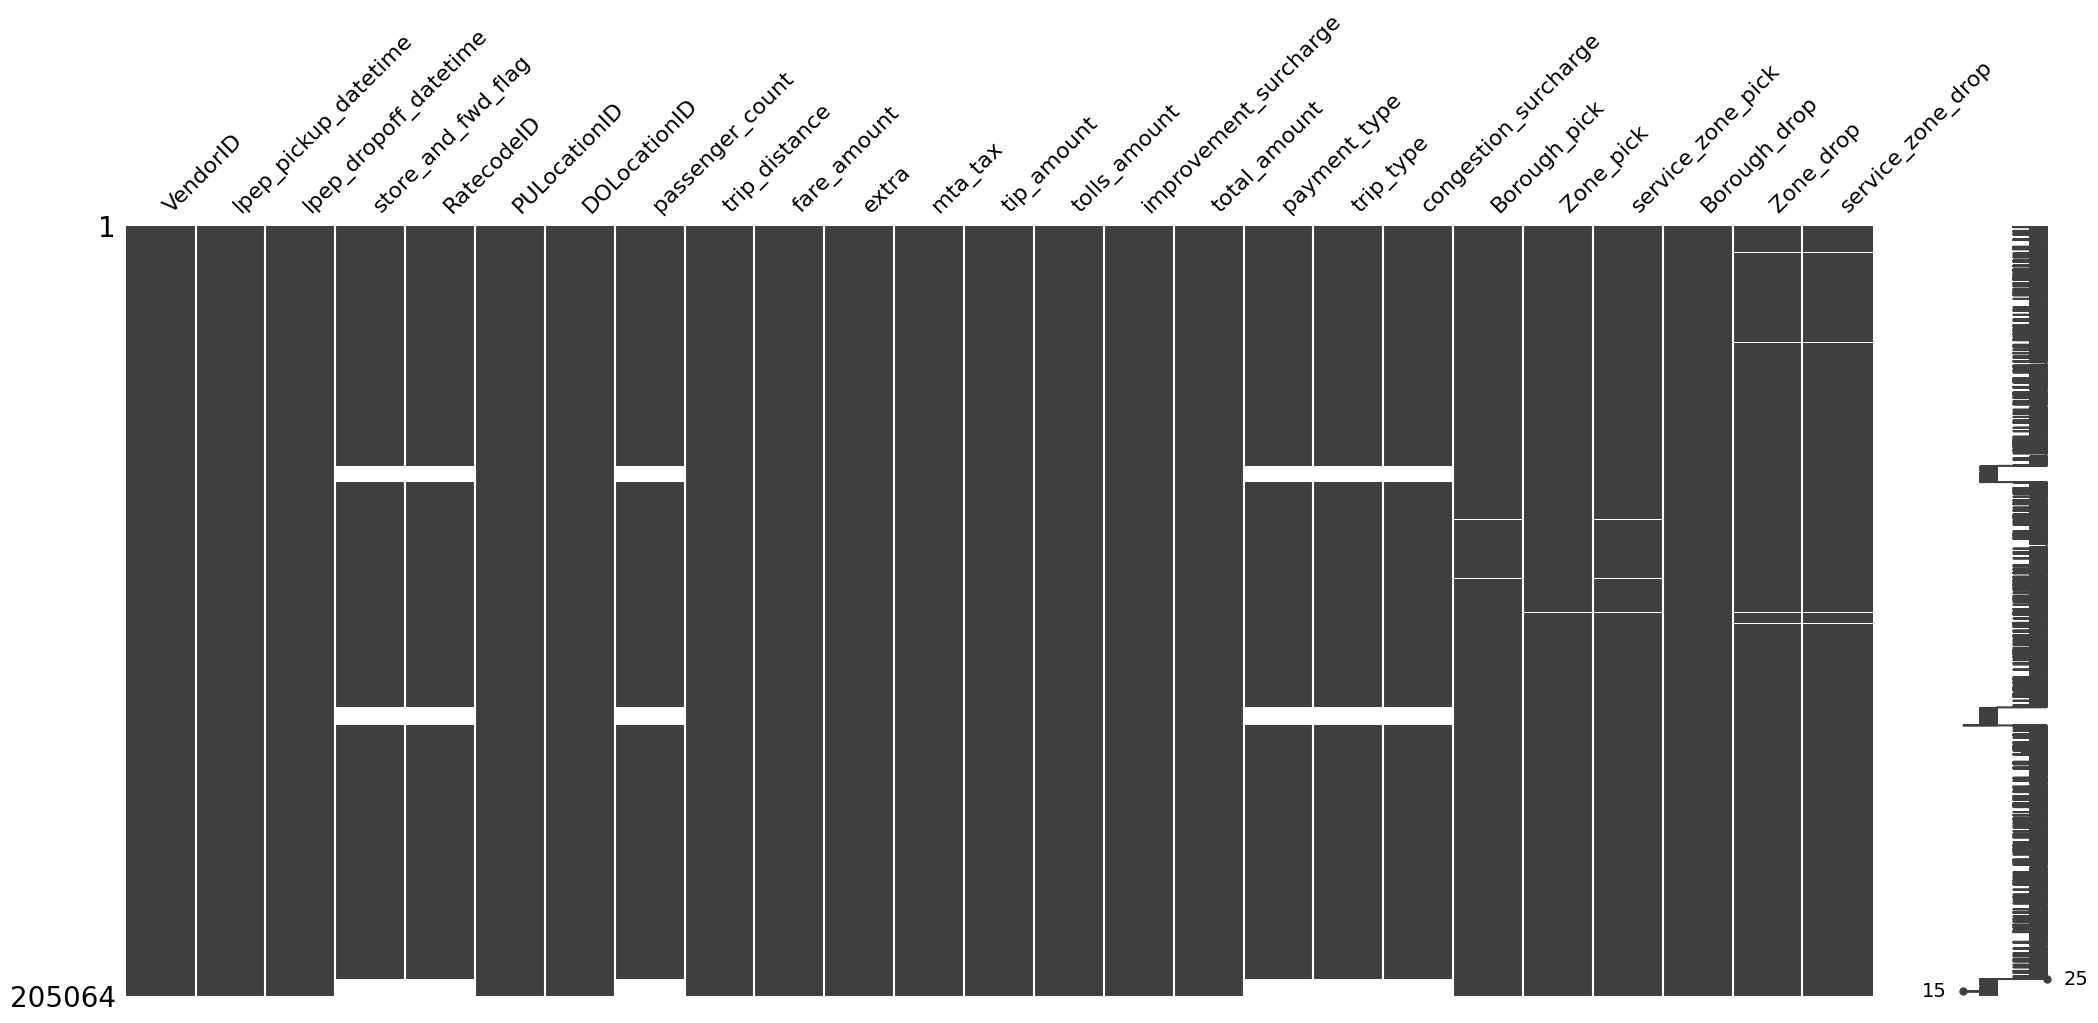

In [6]:
msn.matrix(df)

In [7]:
pickup_trip_distance_median = df.groupby('PULocationID')['trip_distance'].mean().reset_index()
pickup_trip_distance_median

,PULocationID,trip_distance
0,1,4.905000
1,3,4.285357
2,4,0.000000
3,7,33.162801
4,8,2.780000
...,...,...
239,261,5.347500
240,262,3.148095
241,263,3.014706
242,264,0.418454


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205064 entries, 0 to 205063
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               205064 non-null  int64  
 1   lpep_pickup_datetime   205064 non-null  object 
 2   lpep_dropoff_datetime  205064 non-null  object 
 3   store_and_fwd_flag     191382 non-null  object 
 4   RatecodeID             191382 non-null  float64
 5   PULocationID           205064 non-null  int64  
 6   DOLocationID           205064 non-null  int64  
 7   passenger_count        191382 non-null  float64
 8   trip_distance          205064 non-null  float64
 9   fare_amount            205064 non-null  float64
 10  extra                  205064 non-null  float64
 11  mta_tax                205064 non-null  float64
 12  tip_amount             205064 non-null  float64
 13  tolls_amount           205064 non-null  float64
 14  improvement_surcharge  205064 non-nu

In [9]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,205064.000000,191382.000000,205064.000000,205064.000000,191382.000000,205064.000000,205064.000000,205064.000000,205064.000000,205064.000000,205064.000000,205064.000000,205064.000000,191382.000000,191360.000000,191382.000000
mean,1.865423,1.133299,98.964913,138.344073,1.299025,11.401717,16.762729,0.849892,0.578966,2.150009,0.178582,0.955521,21.996157,1.372255,1.026390,0.724755
std,0.341273,1.249531,61.129989,76.434968,0.949010,729.650040,13.348640,1.283100,0.385584,3.019251,1.133474,0.193533,15.371932,0.510237,0.160293,1.211833
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-115.000000,-5.000000,-0.500000,-10.500000,-6.550000,-1.000000,-116.000000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.960000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.860000,13.500000,0.000000,0.500000,1.600000,0.000000,1.000000,18.000000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,217.000000,1.000000,3.290000,19.800000,1.000000,0.500000,3.350000,0.000000,1.000000,26.340000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,178919.980000,490.000000,12.700000,4.250000,270.270000,45.350000,1.000000,491.000000,5.000000,2.000000,2.750000


In [10]:
df.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag       13682
RatecodeID               13682
PULocationID                 0
DOLocationID                 0
passenger_count          13682
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
payment_type             13682
trip_type                13704
congestion_surcharge     13682
Borough_pick               190
Zone_pick                  401
service_zone_pick          591
Borough_drop               692
Zone_drop                 1285
service_zone_drop         1977
dtype: int64

<b>Filling Missing Value</b>

In [11]:
df['passenger_count'] = df['passenger_count'].replace(0, 1)
df['passenger_count'] = df['passenger_count'].apply(lambda x: min(x, 6))
df['passenger_count'].fillna(df['passenger_count'].mode()[0], inplace=True)
df['RatecodeID'] = df['RatecodeID'].fillna(value=99)
df['payment_type'].fillna(df['payment_type'].mode()[0], inplace=True)
df['trip_type'].fillna(df['trip_type'].mode()[0], inplace=True)
df.loc[(df['Borough_pick'] == 'Manhattan') | (df['Borough_drop'] == 'Manhattan'), 'congestion_surcharge'] = 2.75

In [12]:
df[df['passenger_count'] == 0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,Borough_pick,Zone_pick,service_zone_pick,Borough_drop,Zone_drop,service_zone_drop


<b>Data Creation </b>

In [13]:
# Convert lpep_pickup_datetime and lpep_dropoff_datetime to datetime format
df[['lpep_pickup_datetime', 'lpep_dropoff_datetime']] = df[['lpep_pickup_datetime', 'lpep_dropoff_datetime']].apply(pd.to_datetime)

# Extract relevant features from lpep_pickup_datetime
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['lpep_pickup_datetime'].dt.day_name()
df['pickup_month'] = df['lpep_pickup_datetime'].dt.month_name()

# Remove duplicate feature (hour is already extracted as pickup_hour)
df['hour'] = df['lpep_pickup_datetime'].dt.hour

# Extract weekday feature (more intuitive than day_of_week)
df['weekday'] = df['lpep_pickup_datetime'].dt.weekday

# Calculate fare per mile feature
df['fare_per_mile'] = df['fare_amount'] / df['trip_distance']

In [14]:
df['amount_per_mile'] = df['fare_amount'] / df['trip_distance']

# Handle cases where trip_distance is 0 to avoid division by zero
df['amount_per_mile'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['amount_per_mile'].fillna(0, inplace=True)

# Calculate the average amount per mile
average_amount_per_mile = df['amount_per_mile'].mean()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205064 entries, 0 to 205063
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               205064 non-null  int64         
 1   lpep_pickup_datetime   205064 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  205064 non-null  datetime64[ns]
 3   store_and_fwd_flag     191382 non-null  object        
 4   RatecodeID             205064 non-null  float64       
 5   PULocationID           205064 non-null  int64         
 6   DOLocationID           205064 non-null  int64         
 7   passenger_count        205064 non-null  float64       
 8   trip_distance          205064 non-null  float64       
 9   fare_amount            205064 non-null  float64       
 10  extra                  205064 non-null  float64       
 11  mta_tax                205064 non-null  float64       
 12  tip_amount             205064 non-null  floa

In [16]:
df.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_hour,hour,weekday,fare_per_mile,amount_per_mile
count,205064.000000,205064,205064,205064.000000,205064.000000,205064.000000,205064.000000,205064.000000,205064.000000,205064.000000,...,205064.000000,205064.000000,205064.000000,205064.000000,199462.000000,205064.000000,205064.000000,205064.000000,2.049000e+05,205064.000000
mean,1.865423,2023-02-15 13:07:56.177656832,2023-02-15 13:25:58.142457856,7.663027,98.964913,138.344073,1.284589,11.401717,16.762729,0.849892,...,0.955521,21.996157,1.347418,1.024626,1.772220,13.881091,13.881091,2.878960,NaN,10.433184
min,1.000000,2008-12-31 23:02:29,2009-01-01 16:41:01,1.000000,1.000000,1.000000,1.000000,0.000000,-115.000000,-5.000000,...,-1.000000,-116.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-inf,-8000.000000
25%,2.000000,2023-01-24 16:24:45.249999872,2023-01-24 16:41:48.500000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,...,1.000000,12.960000,1.000000,1.000000,0.000000,10.000000,10.000000,1.000000,5.551648e+00,5.280000
50%,2.000000,2023-02-15 15:48:32.500000,2023-02-15 16:05:16,1.000000,75.000000,138.000000,1.000000,1.860000,13.500000,0.000000,...,1.000000,18.000000,1.000000,1.000000,2.750000,15.000000,15.000000,3.000000,6.719368e+00,6.516854
75%,2.000000,2023-03-09 15:49:50.750000128,2023-03-09 16:06:18,1.000000,129.000000,217.000000,1.000000,3.290000,19.800000,1.000000,...,1.000000,26.340000,2.000000,1.000000,2.750000,18.000000,18.000000,4.000000,8.275862e+00,7.900000
max,2.000000,2023-04-01 00:09:27,2023-04-01 17:32:21,99.000000,265.000000,265.000000,6.000000,178919.980000,490.000000,12.700000,...,1.000000,491.000000,5.000000,2.000000,2.750000,23.000000,23.000000,6.000000,inf,19950.000000
std,0.341273,NaN,NaN,24.451292,61.129989,76.434968,0.913904,729.650040,13.348640,1.283100,...,0.193533,15.371932,0.501598,0.154984,1.316378,5.260740,5.260740,1.899514,NaN,122.265996


In [17]:
#Anomali Data, total amount tapi pembayaran bukan 3(No Charge)
df[(df['payment_type'] != 3) & (df['total_amount'] < 0)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,Borough_drop,Zone_drop,service_zone_drop,pickup_hour,pickup_day_of_week,pickup_month,hour,weekday,fare_per_mile,amount_per_mile
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.00,...,Queens,Queensbridge/Ravenswood,Boro Zone,17,Sunday,January,17,6,-inf,0.000000
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1.0,75,75,1.0,0.77,-4.50,...,Manhattan,East Harlem South,Boro Zone,12,Monday,January,12,0,-5.844156,-5.844156
1919,2,2023-01-02 14:03:10,2023-01-02 14:03:26,N,1.0,75,75,1.0,0.00,-3.00,...,Manhattan,East Harlem South,Boro Zone,14,Monday,January,14,0,-inf,0.000000
3761,2,2023-01-03 14:25:22,2023-01-03 14:27:53,N,1.0,42,42,2.0,0.32,-4.40,...,Manhattan,Central Harlem North,Boro Zone,14,Tuesday,January,14,1,-13.750000,-13.750000
6501,2,2023-01-04 18:35:37,2023-01-04 18:36:08,N,1.0,74,74,1.0,0.00,-3.00,...,Manhattan,East Harlem North,Boro Zone,18,Wednesday,January,18,2,-inf,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199322,2,2023-03-31 15:02:01,2023-03-31 15:02:25,N,1.0,74,74,1.0,0.10,-3.00,...,Manhattan,East Harlem North,Boro Zone,15,Friday,March,15,4,-30.000000,-30.000000
199381,2,2023-03-31 15:16:55,2023-03-31 15:17:38,N,1.0,42,42,2.0,0.00,-3.00,...,Manhattan,Central Harlem North,Boro Zone,15,Friday,March,15,4,-inf,0.000000
199561,2,2023-03-31 16:10:03,2023-03-31 16:13:51,N,1.0,74,75,1.0,0.49,-5.80,...,Manhattan,East Harlem South,Boro Zone,16,Friday,March,16,4,-11.836735,-11.836735
200487,2,2023-03-31 23:55:09,2023-04-01 00:00:16,N,1.0,82,82,1.0,0.29,-6.50,...,Queens,Elmhurst,Boro Zone,23,Friday,March,23,4,-22.413793,-22.413793


In [18]:
customer_count = df.groupby('PULocationID').size().reset_index(name='customer_count')
top10_PU = customer_count.sort_values('customer_count', ascending=False).head(10)
top10_PU

,PULocationID,customer_count
67,74,38821
68,75,27932
35,41,12500
149,166,12459
87,95,11301
75,82,8508
37,43,8308
89,97,6425
36,42,5821
222,244,5581


<b>Visualization</b>

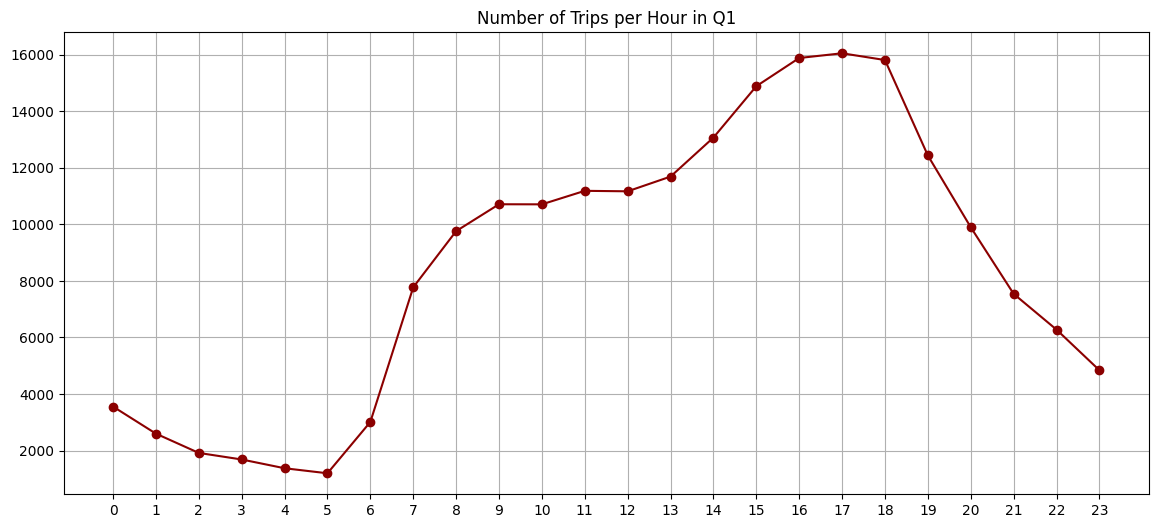

In [19]:
hourly_trips = df.groupby('pickup_hour').size()
daily_trips = df.groupby('pickup_day_of_week').size()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_trips = daily_trips.reindex(days_order)

plt.figure(figsize=(14, 6))
plt.plot(hourly_trips.index, hourly_trips.values, marker='o', linestyle='-', color='darkred')
plt.title('Number of Trips per Hour in Q1')
plt.xlabel(None)
plt.ylabel(None)
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

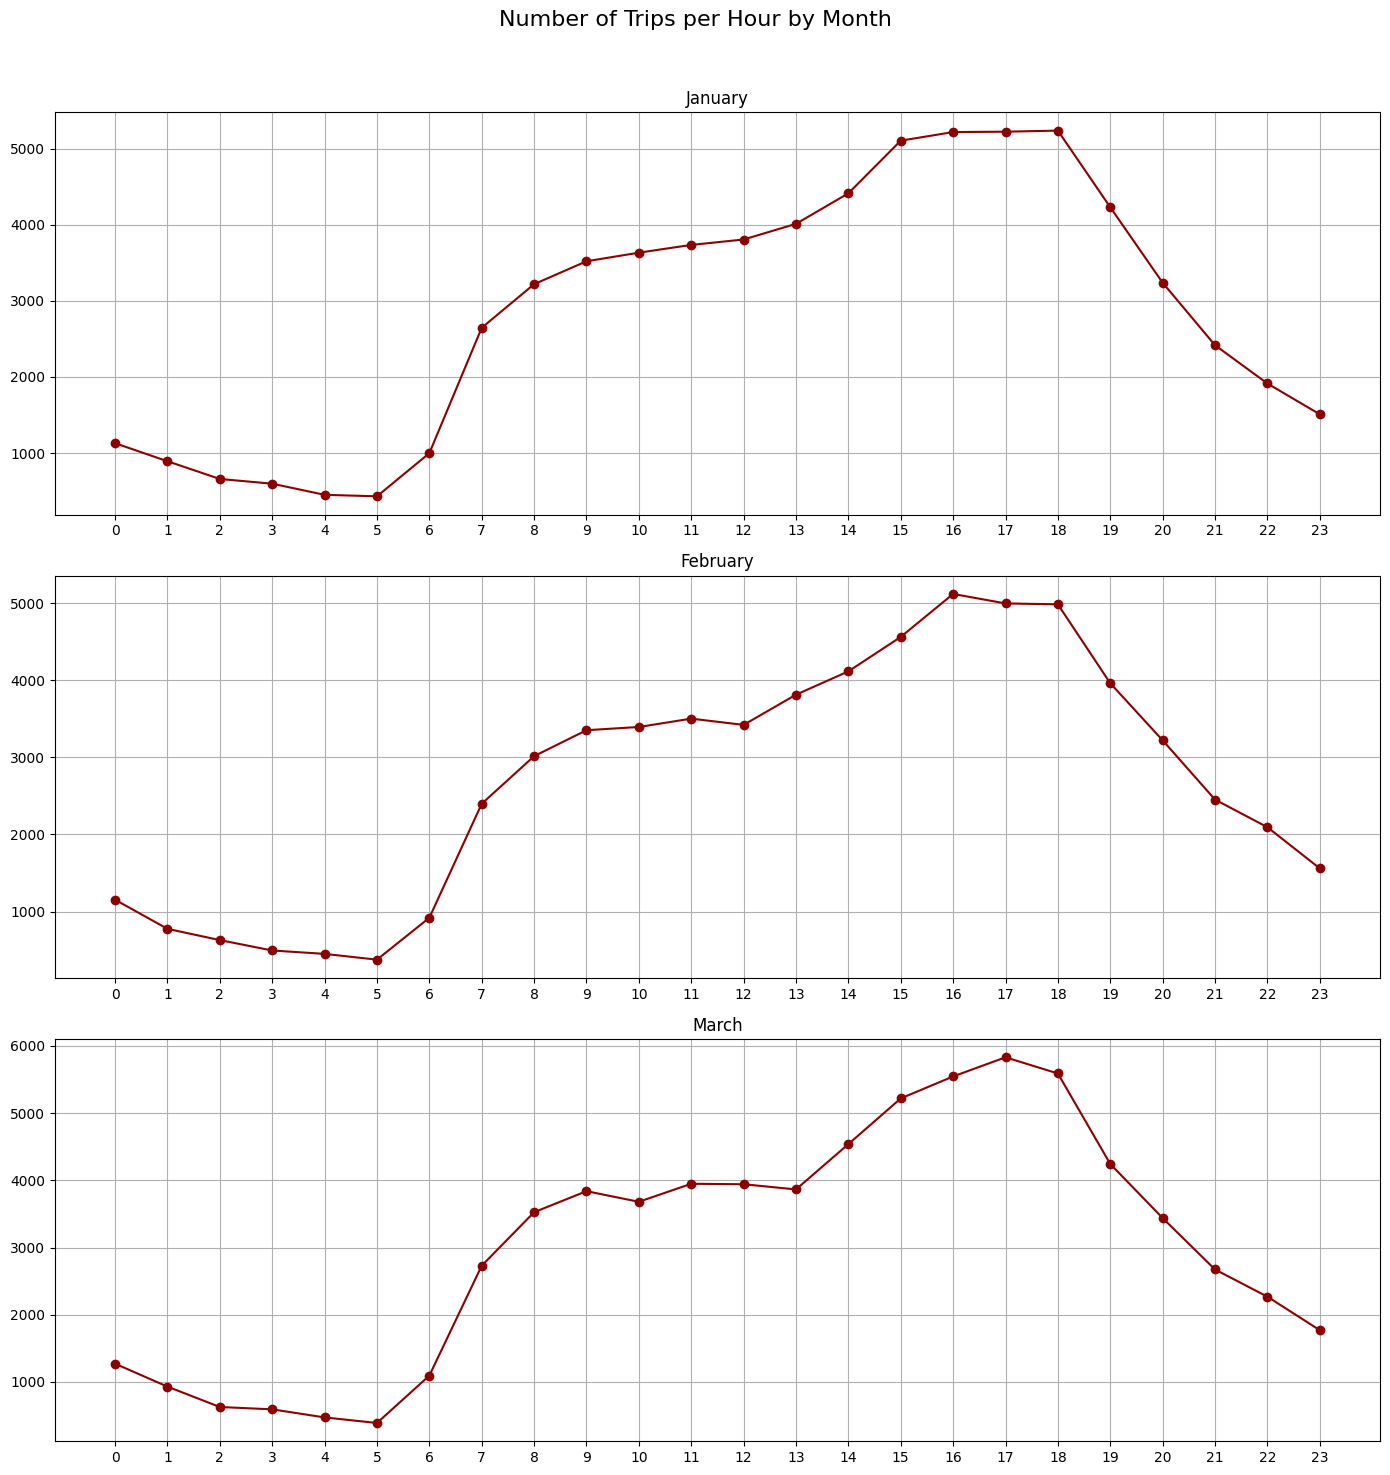

In [20]:
months_to_plot = ['January', 'February', 'March']

fig, axs_hour = plt.subplots(len(months_to_plot), 1, figsize=(14, 15), sharex=False)
fig.suptitle('Number of Trips per Hour by Month', fontsize=16)

for i, month in enumerate(months_to_plot):
    df_month = df[df['pickup_month'] == month]
    
    hourly_trips_month = df_month.groupby('pickup_hour').size()

    axs_hour[i].plot(hourly_trips_month.index, hourly_trips_month.values, marker='o', linestyle='-', color='darkred')
    axs_hour[i].set_title(f'{month}')
    axs_hour[i].set_xlabel(None)
    axs_hour[i].set_ylabel(None)
    axs_hour[i].grid(True)
    axs_hour[i].set_xticks(range(0, 24))

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

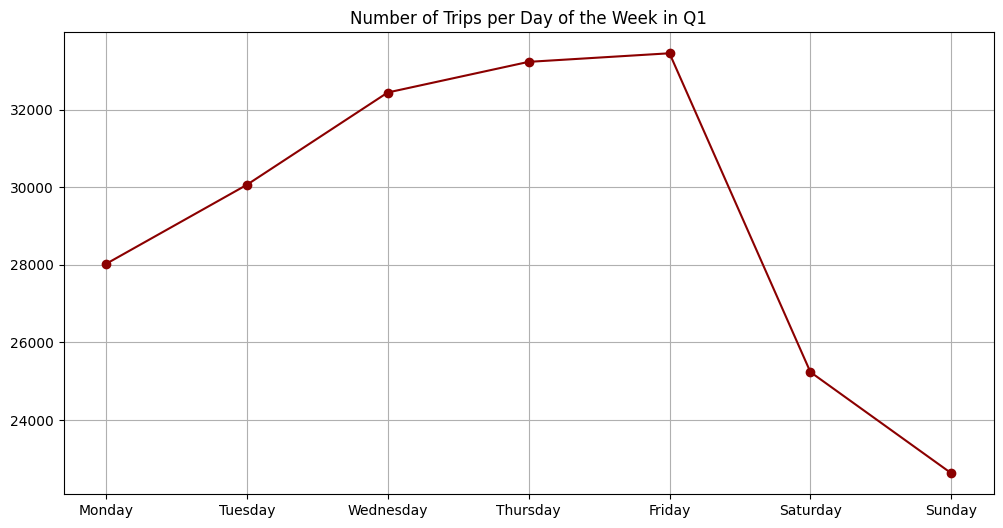

In [21]:
# Plotting the number of trips per day of the week
plt.figure(figsize=(12, 6))
plt.plot(daily_trips.index, daily_trips.values, marker='o', linestyle='-', color='darkred')
plt.title('Number of Trips per Day of the Week in Q1')
plt.xlabel(None)
plt.ylabel(None)
plt.grid(True)
plt.show()

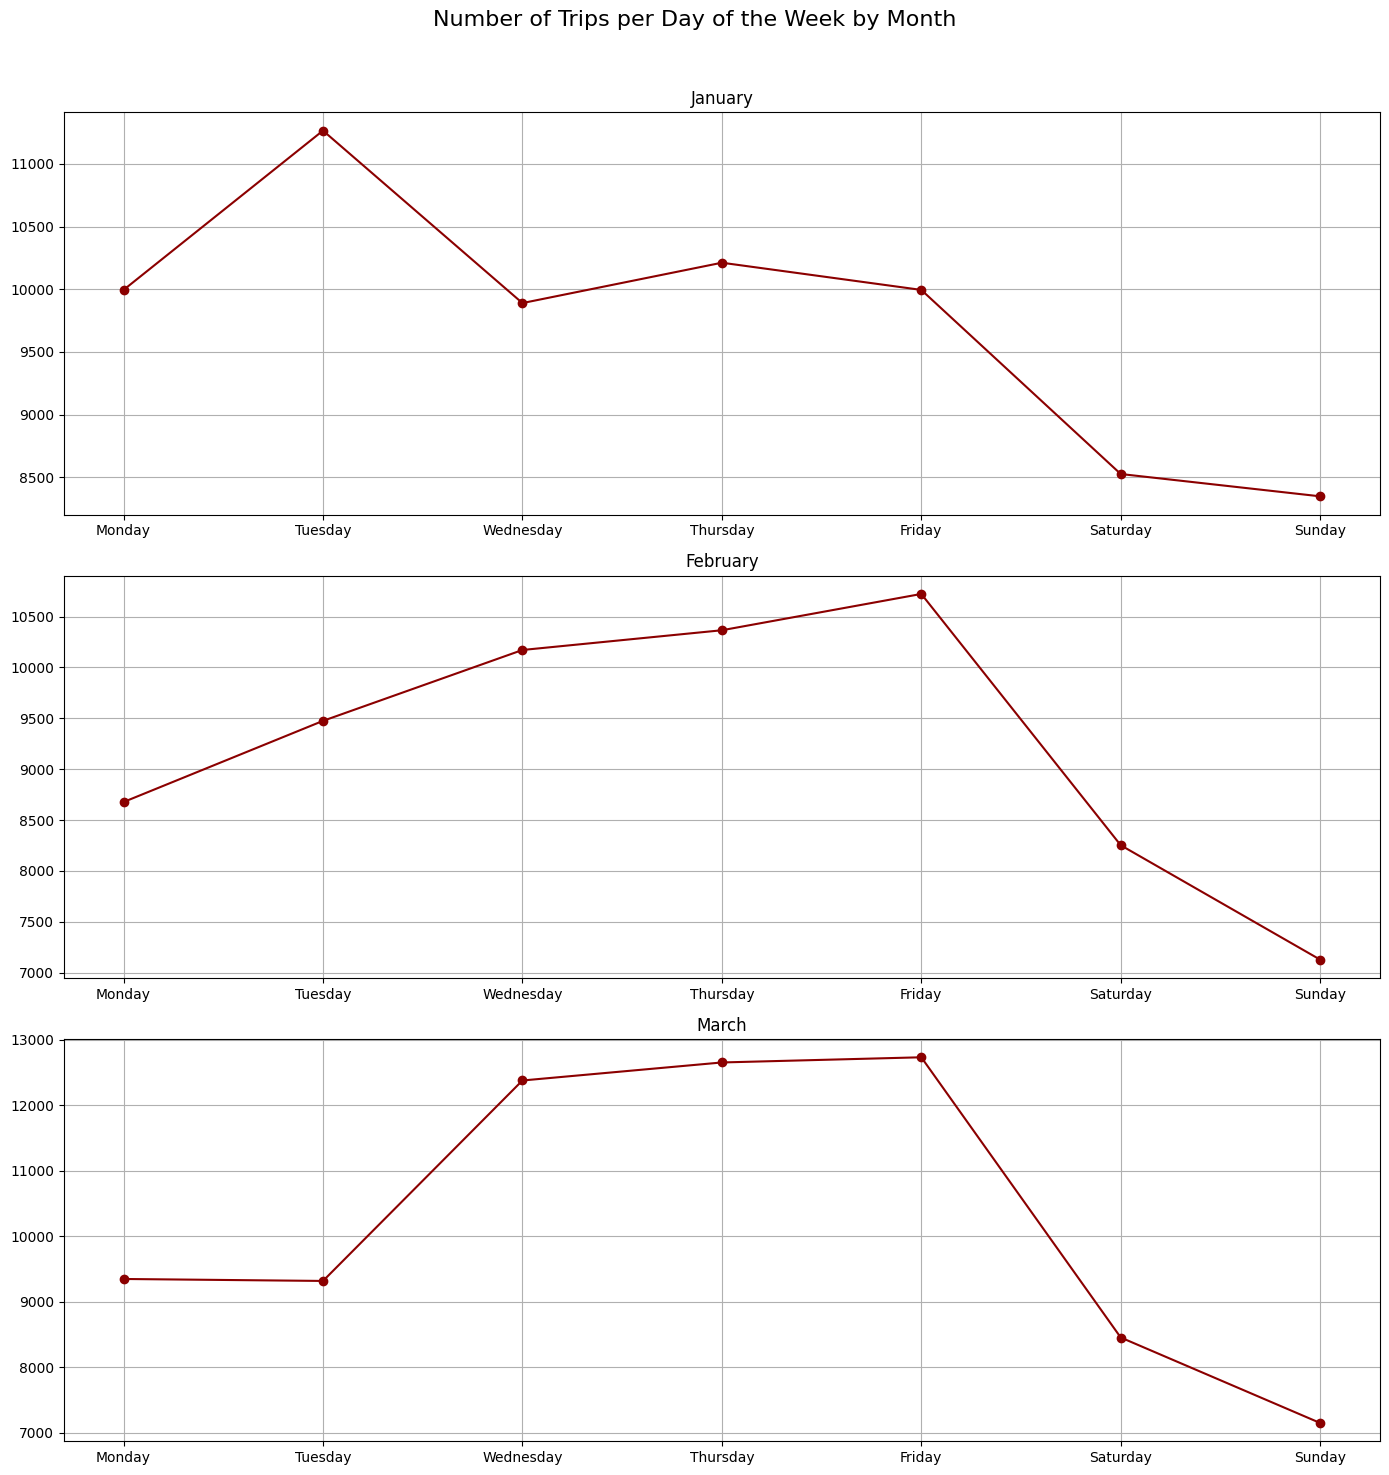

In [22]:
# Create subplots for number of trips per day of the week
fig, axs_day = plt.subplots(len(months_to_plot), 1, figsize=(14, 15), sharex=False)
fig.suptitle('Number of Trips per Day of the Week by Month', fontsize=16)

for i, month in enumerate(months_to_plot):
    # Filter data for the month
    df_month = df[df['pickup_month'] == month]
    
    # Calculate the number of trips per day of the week
    daily_trips_month = df_month.groupby('pickup_day_of_week').size()
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    daily_trips_month = daily_trips_month.reindex(days_order)
    
    # Plotting the number of trips per day of the week
    axs_day[i].plot(daily_trips_month.index, daily_trips_month.values, marker='o', linestyle='-', color='darkred')
    axs_day[i].set_title(f'{month}')
    axs_day[i].set_xlabel(None)
    axs_day[i].set_ylabel(None)
    axs_day[i].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

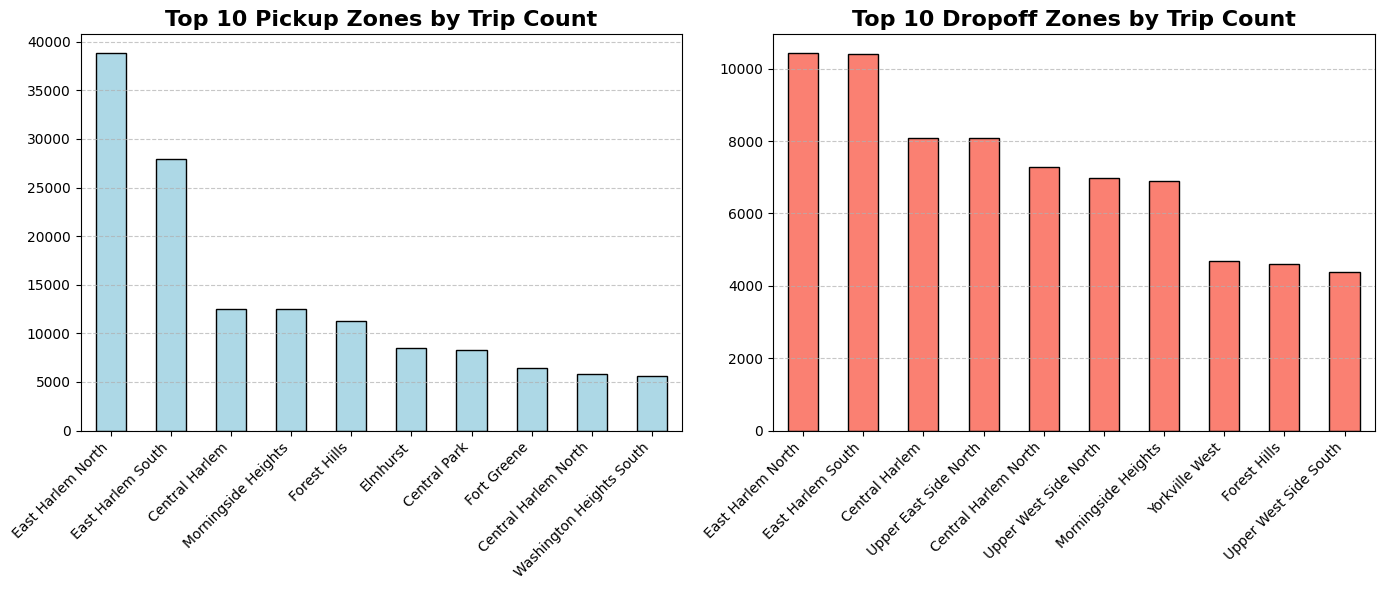

In [23]:
pickup_zone_counts = df['Zone_pick'].value_counts()
dropoff_zone_counts = df['Zone_drop'].value_counts()

# Selecting the top 10 pickup and dropoff zones
top_10_pickup_zones = pickup_zone_counts.nlargest(10)
top_10_dropoff_zones = dropoff_zone_counts.nlargest(10)

# Plotting the top 10 trip counts for pickup and dropoff zones
plt.figure(figsize=(14, 6))

# Top 10 Pickup zones
plt.subplot(1, 2, 1)
top_10_pickup_zones.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Top 10 Pickup Zones by Trip Count', fontsize=16, weight='bold')
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Top 10 Dropoff zones
plt.subplot(1, 2, 2)
top_10_dropoff_zones.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Top 10 Dropoff Zones by Trip Count', fontsize=16, weight='bold')
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

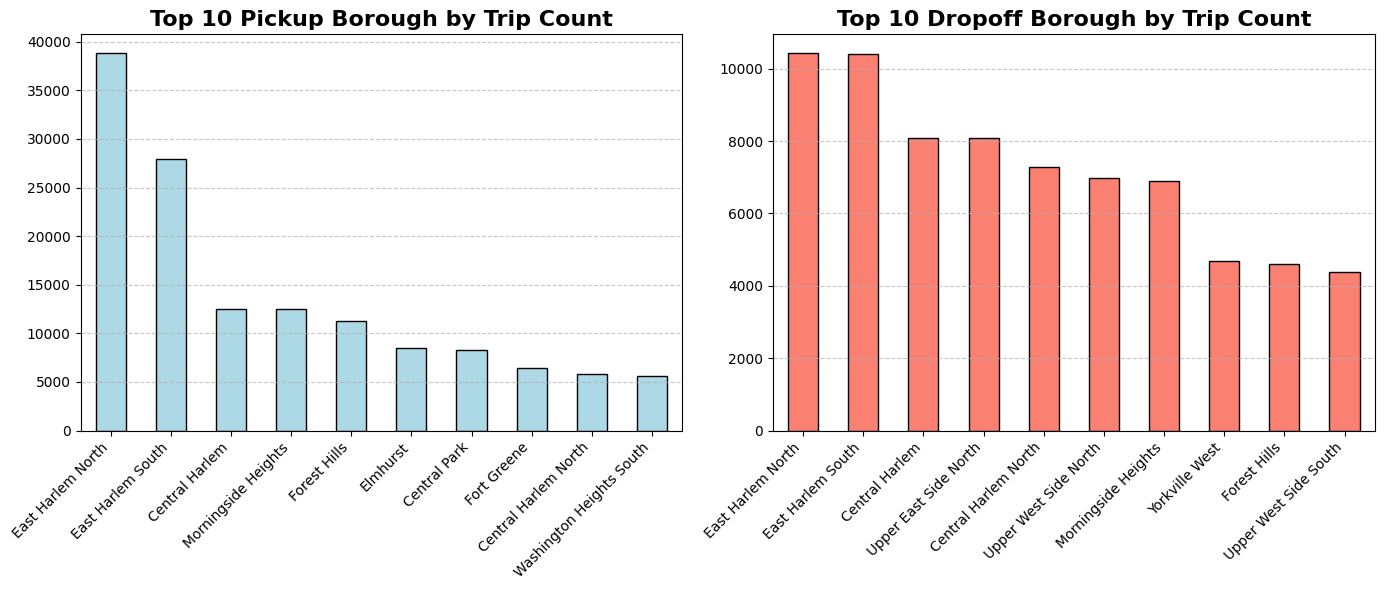

In [24]:
pickup_borough_counts = df['Borough_pick'].value_counts()
dropoff_borough_counts = df['Borough_drop'].value_counts()
top_10_pickup_borough = pickup_zone_counts.nlargest(10)
top_10_dropoff_borough = dropoff_zone_counts.nlargest(10)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
top_10_pickup_zones.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Top 10 Pickup Borough by Trip Count', fontsize=16, weight='bold')
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
top_10_dropoff_zones.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Top 10 Dropoff Borough by Trip Count', fontsize=16, weight='bold')
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

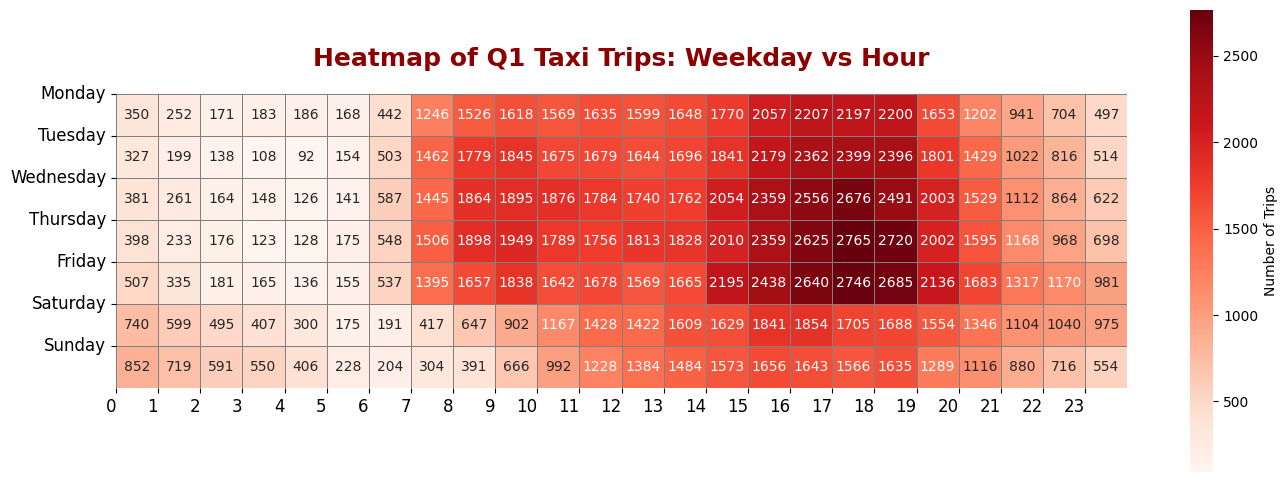

In [25]:
hourly_weekly_trend = df.groupby(['weekday', 'hour']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(hourly_weekly_trend, cmap='Reds', linewidths=0.5, linecolor='gray', annot=True, fmt='d', 
                      cbar_kws={'shrink': 0.6, 'label': 'Number of Trips'}, square=True, annot_kws={"size": 10})
plt.title('Heatmap of Q1 Taxi Trips: Weekday vs Hour', fontsize=18, weight='bold', color='darkred', pad=20)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(range(24), range(24), fontsize=12,ha='right')
plt.yticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

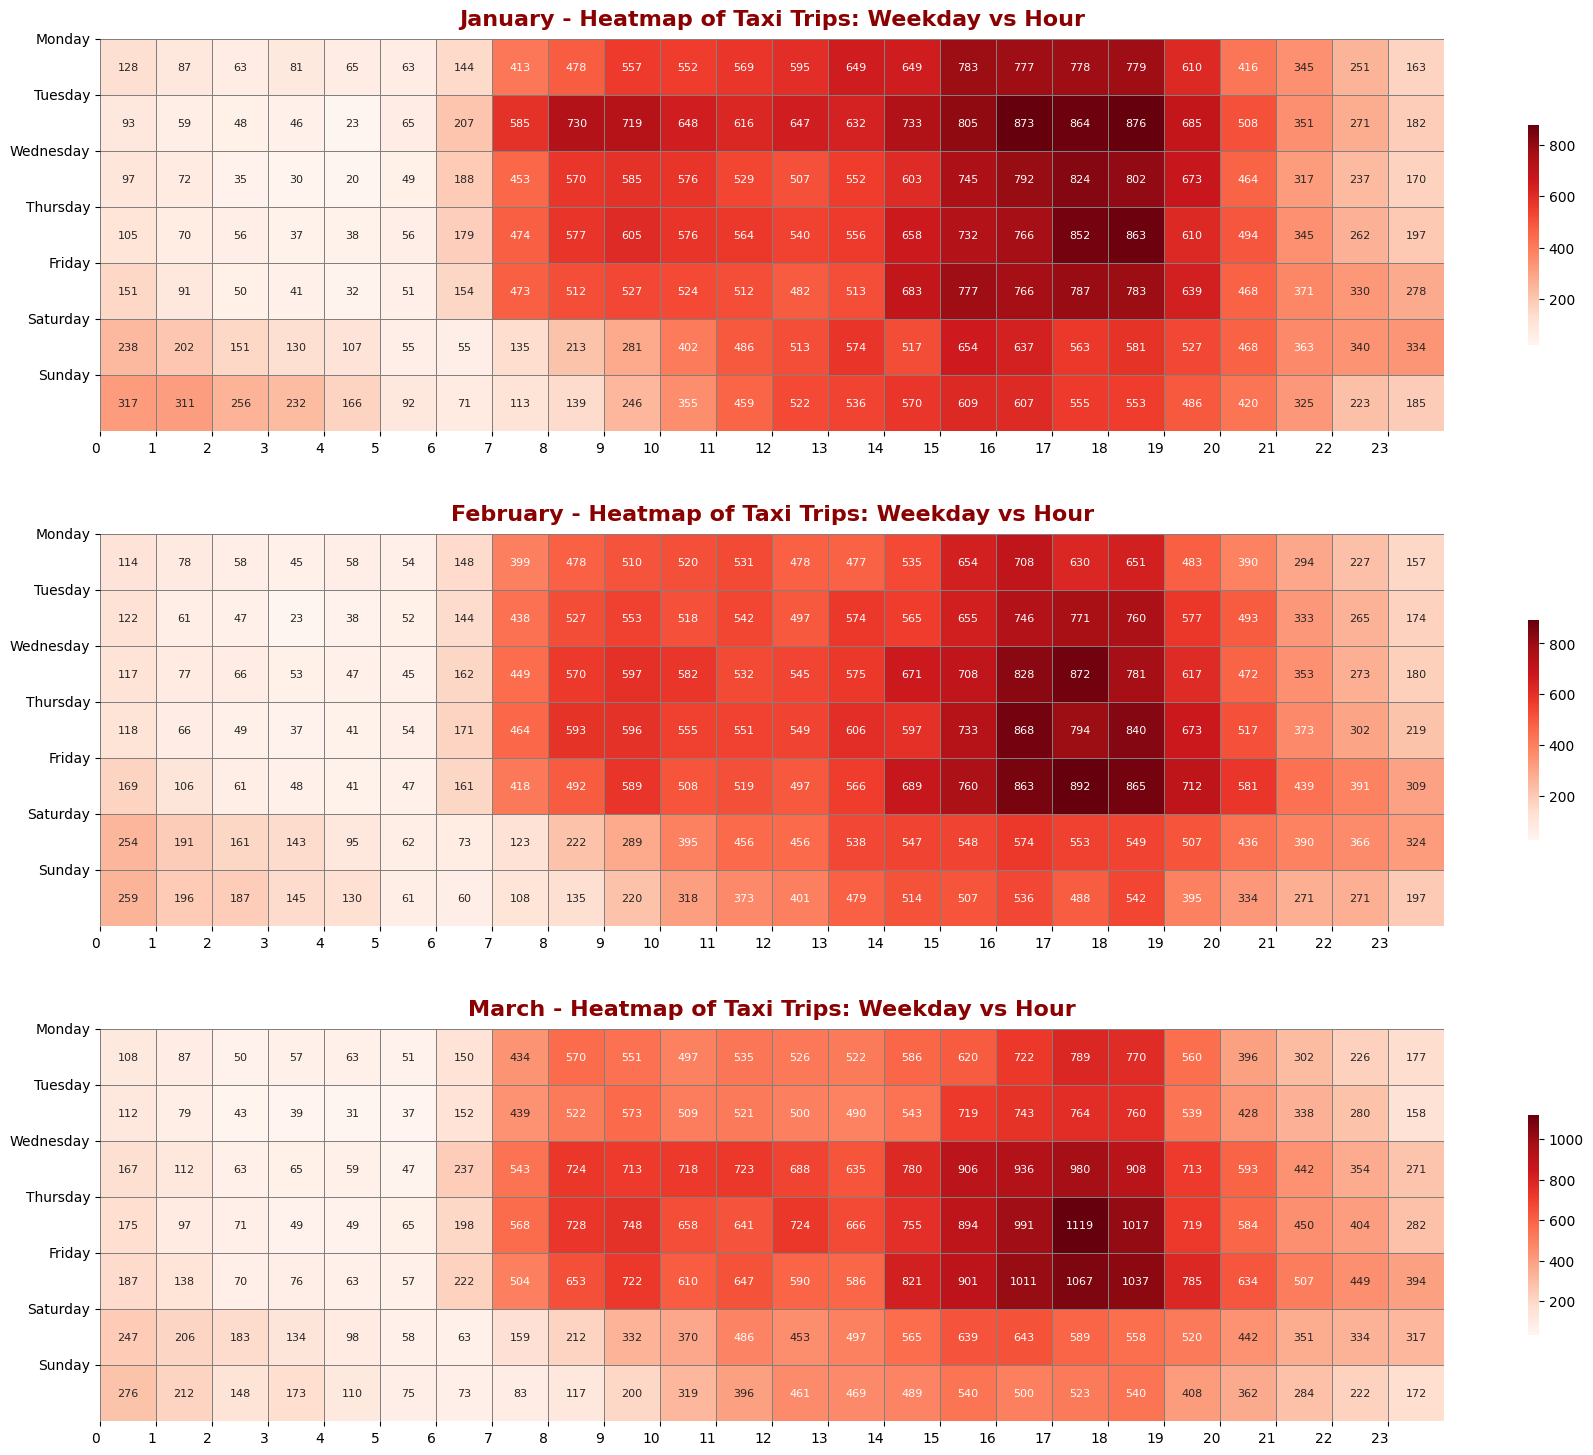

In [26]:
df['month'] = df['lpep_pickup_datetime'].dt.month

data_january = df[df['month'] == 1]
data_february = df[df['month'] == 2]
data_march = df[df['month'] == 3]

trend_january = data_january.groupby(['weekday', 'hour']).size().unstack(fill_value=0)
trend_february = data_february.groupby(['weekday', 'hour']).size().unstack(fill_value=0)
trend_march = data_march.groupby(['weekday', 'hour']).size().unstack(fill_value=0)

plt.figure(figsize=(18, 15))

# January
plt.subplot(3, 1, 1)
sns.heatmap(trend_january, cmap='Reds', linewidths=0.5, linecolor='gray', annot=True, fmt='d', 
            cbar_kws={'shrink': 0.5}, square=True, annot_kws={"size": 8})
plt.title('January - Heatmap of Taxi Trips: Weekday vs Hour', fontsize=16, weight='bold', color='darkred', pad=10)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(range(24), range(24), fontsize=10, ha='right')
plt.yticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize=10, rotation=0)

# February
plt.subplot(3, 1, 2)
sns.heatmap(trend_february, cmap='Reds', linewidths=0.5, linecolor='gray', annot=True, fmt='d', 
            cbar_kws={'shrink': 0.5}, square=True, annot_kws={"size": 8})
plt.title('February - Heatmap of Taxi Trips: Weekday vs Hour', fontsize=16, weight='bold', color='darkred', pad=10, rotation=0)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(range(24), range(24), fontsize=10, ha='right')
plt.yticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize=10, rotation=0)

# March
plt.subplot(3, 1, 3)
sns.heatmap(trend_march, cmap='Reds', linewidths=0.5, linecolor='gray', annot=True, fmt='d', 
            cbar_kws={'shrink': 0.5}, square=True, annot_kws={"size": 8})
plt.title('March - Heatmap of Taxi Trips: Weekday vs Hour', fontsize=16, weight='bold', color='darkred', pad=10)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(range(24), range(24), fontsize=10, ha='right')
plt.yticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize=10, rotation=0)
plt.tight_layout()
plt.show()

In [27]:
# Konversi kolom waktu ke format datetime
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

# Hitung durasi perjalanan


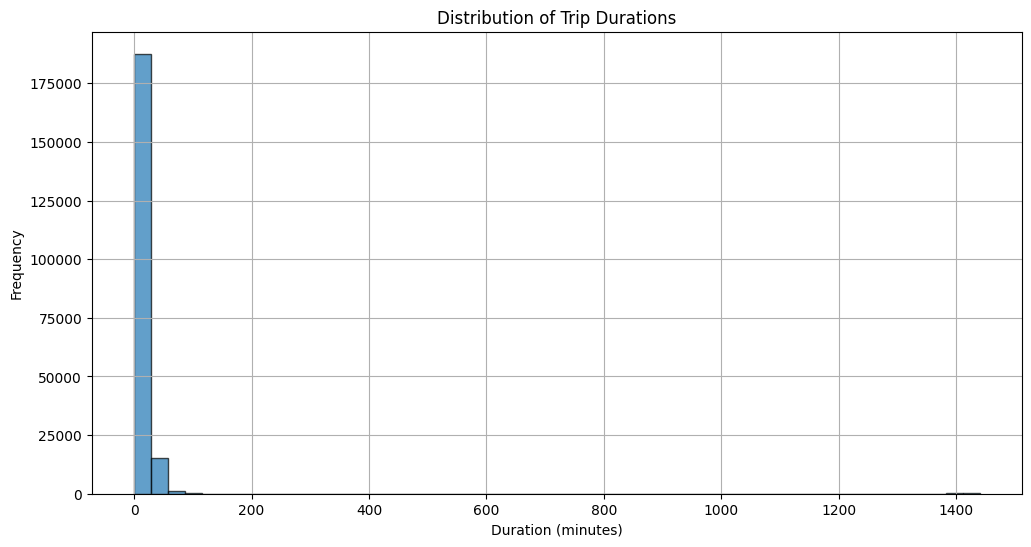

Correlation between congestion surcharge and total amount: 0.02


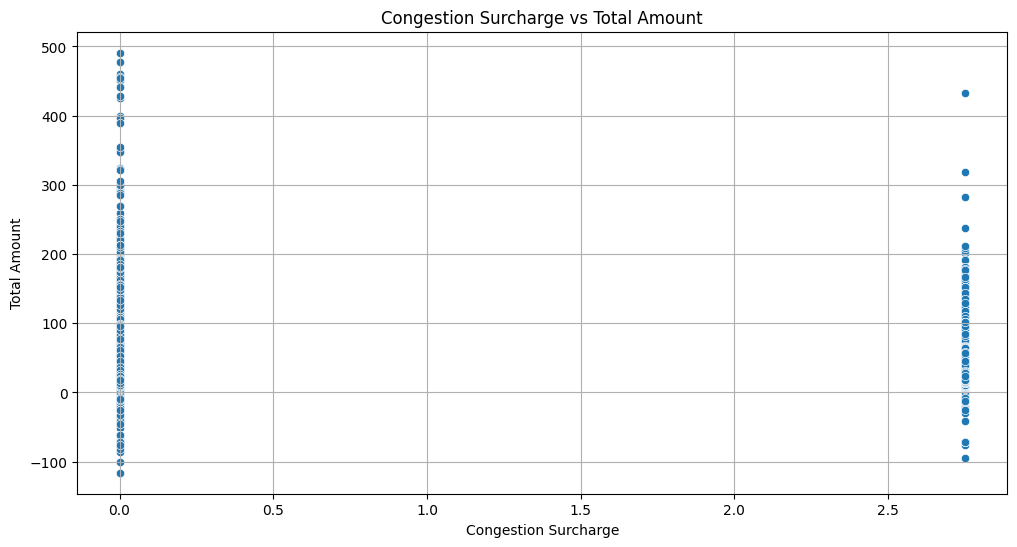

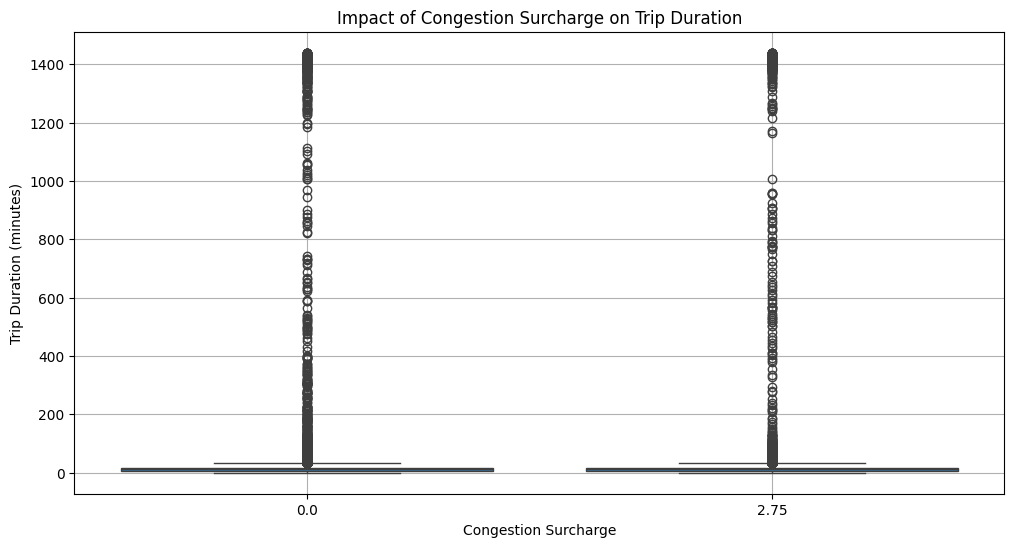

In [28]:
df['pickup_hour'] = df['lpep_pickup_datetime'].dt.hour

# Hitung frekuensi perjalanan per jam
hourly_trips = df['pickup_hour'].value_counts().sort_index()

# 2. Visualisasi distribusi durasi perjalanan
plt.figure(figsize=(12, 6))
plt.hist(df['trip_duration'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 3. Menghitung dampak biaya kemacetan terhadap total biaya dan durasi perjalanan
if 'congestion_surcharge' in df.columns and 'total_amount' in df.columns:
    # Korelasi antara biaya kemacetan dan total biaya perjalanan
    correlation = df[['congestion_surcharge', 'total_amount']].corr().iloc[0, 1]
    print(f'Correlation between congestion surcharge and total amount: {correlation:.2f}')

    # Plot hubungan antara biaya kemacetan dan total biaya perjalanan
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='congestion_surcharge', y='total_amount', data=df)
    plt.title('Congestion Surcharge vs Total Amount')
    plt.xlabel('Congestion Surcharge')
    plt.ylabel('Total Amount')
    plt.grid(True)
    plt.show()

    # Plot dampak biaya kemacetan terhadap durasi perjalanan
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='congestion_surcharge', y='trip_duration', data=df)
    plt.title('Impact of Congestion Surcharge on Trip Duration')
    plt.xlabel('Congestion Surcharge')
    plt.ylabel('Trip Duration (minutes)')
    plt.grid(True)
    plt.show()
else:
    print("Kolom 'congestion_surcharge' atau 'total_amount' tidak ditemukan dalam dataset.")

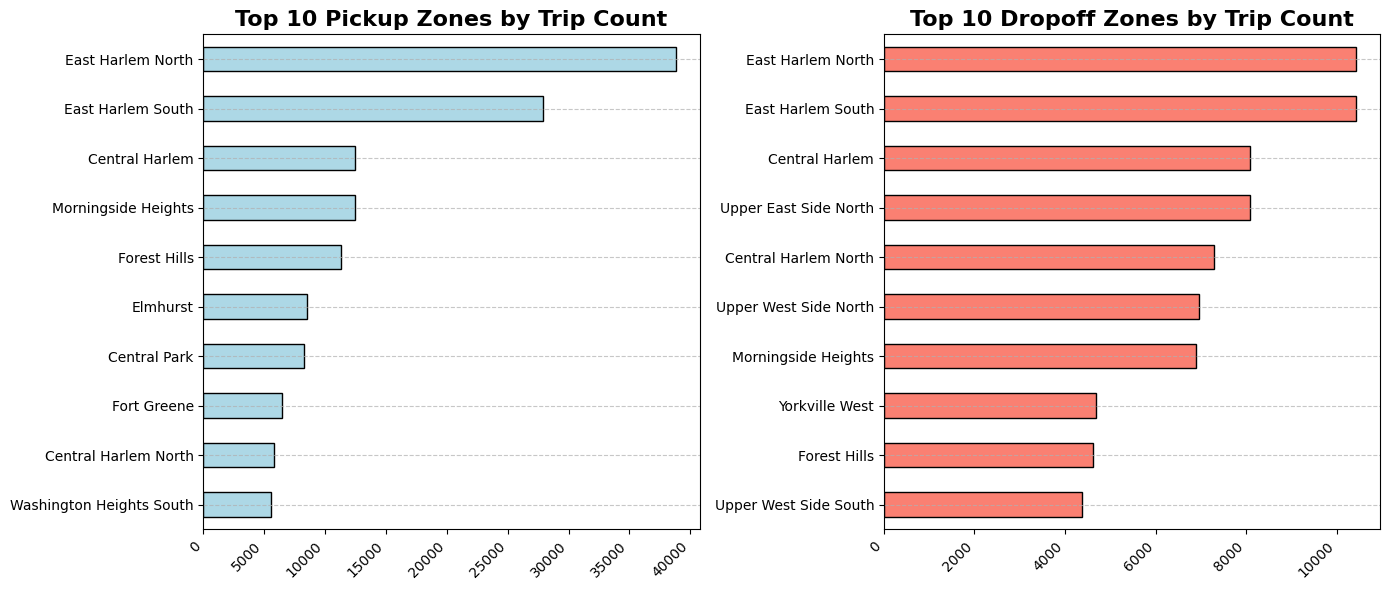

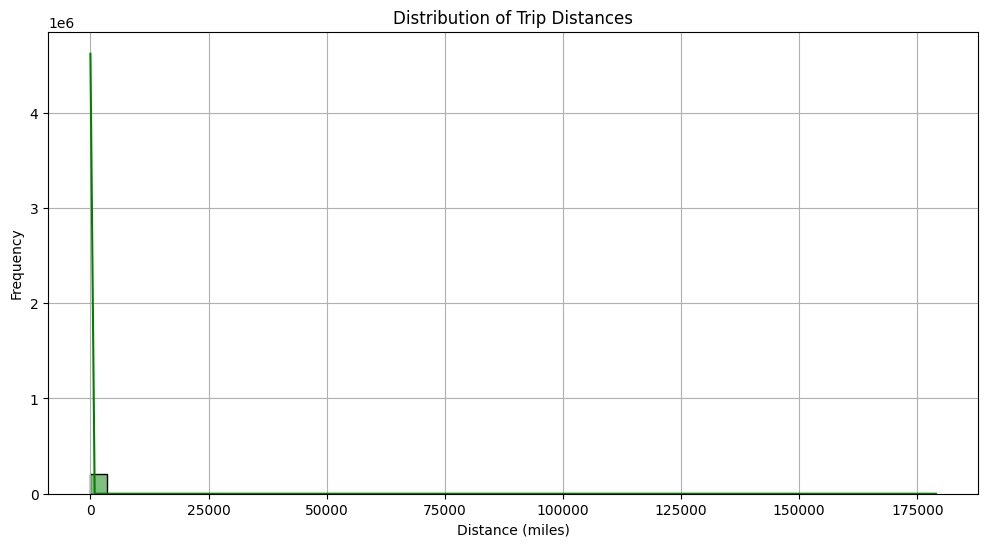

Average Trip Distance: 11.40 miles


In [29]:
pickup_zone_counts = df['Zone_pick'].value_counts()
dropoff_zone_counts = df['Zone_drop'].value_counts()

# Selecting the top 10 pickup and dropoff zones
top_10_pickup_zones = pickup_zone_counts.nlargest(10).sort_values(ascending=True)
top_10_dropoff_zones = dropoff_zone_counts.nlargest(10).sort_values(ascending=True)

# Plotting the top 10 trip counts for pickup and dropoff zones
plt.figure(figsize=(14, 6))

# Top 10 Pickup zones
plt.subplot(1, 2, 1)
top_10_pickup_zones.plot(kind='barh', color='lightblue', edgecolor='black')
plt.title('Top 10 Pickup Zones by Trip Count', fontsize=16, weight='bold')
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Top 10 Dropoff zones
plt.subplot(1, 2, 2)
top_10_dropoff_zones.plot(kind='barh', color='salmon', edgecolor='black')
plt.title('Top 10 Dropoff Zones by Trip Count', fontsize=16, weight='bold')
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Step 2: Analisis distribusi jarak perjalanan

# Visualisasi distribusi jarak perjalanan
plt.figure(figsize=(12, 6))
sns.histplot(df['trip_distance'], bins=50, kde=True, color='green')
plt.title('Distribution of Trip Distances')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Menghitung jarak rata-rata perjalanan
average_distance = df['trip_distance'].mean()
print(f'Average Trip Distance: {average_distance:.2f} miles')


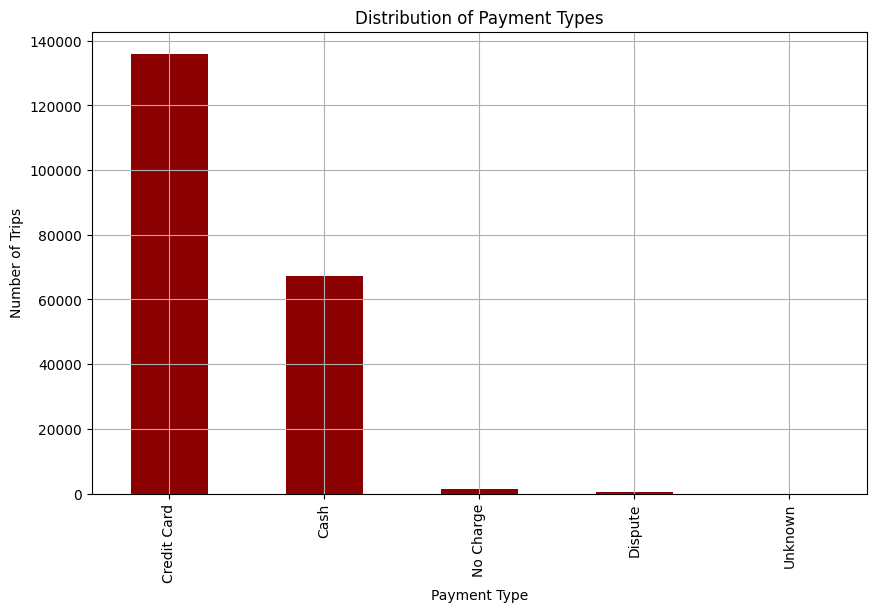

In [30]:
# Step 1: Mengidentifikasi proporsi jenis pembayaran

# Membuat map untuk jenis pembayaran jika perlu
payment_mapping = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

# Menambahkan kolom nama pembayaran jika tidak ada
df['payment_name'] = df['payment_type'].map(payment_mapping)

# Menghitung frekuensi setiap jenis pembayaran
payment_counts = df['payment_name'].value_counts()

# Visualisasi proporsi jenis pembayaran
plt.figure(figsize=(10, 6))
payment_counts.plot(kind='bar', color='darkred')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

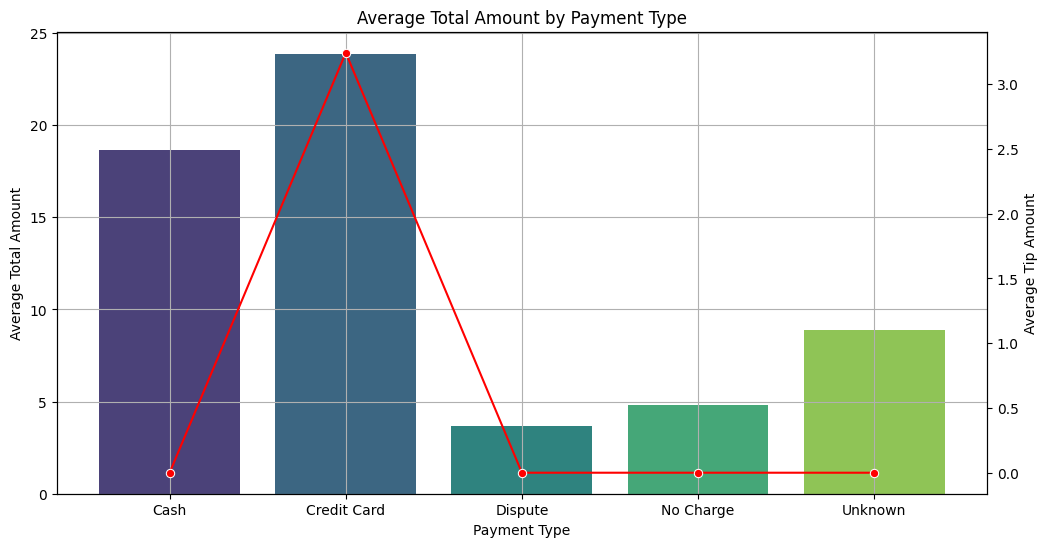

In [31]:
# Step 2: Menganalisis dampak jenis pembayaran terhadap pendapatan

# Menghitung rata-rata total pendapatan dan tip berdasarkan jenis pembayaran
payment_analysis = df.groupby('payment_name').agg({
    'total_amount': 'mean',
    'tip_amount': 'mean'
}).reset_index()

# Visualisasi rata-rata total pendapatan dan tip berdasarkan jenis pembayaran
fig, ax1 = plt.subplots(figsize=(12, 6))

sns.barplot(x='payment_name', y='total_amount', data=payment_analysis, ax=ax1, palette='viridis')
ax1.set_title('Average Total Amount by Payment Type')
ax1.set_xlabel('Payment Type')
ax1.set_ylabel('Average Total Amount')
ax1.grid(True)

# Tambahkan sumbu kedua untuk tip
ax2 = ax1.twinx()
sns.lineplot(x='payment_name', y='tip_amount', data=payment_analysis, ax=ax2, color='red', marker='o')
ax2.set_ylabel('Average Tip Amount')
ax2.grid(False)

plt.show()

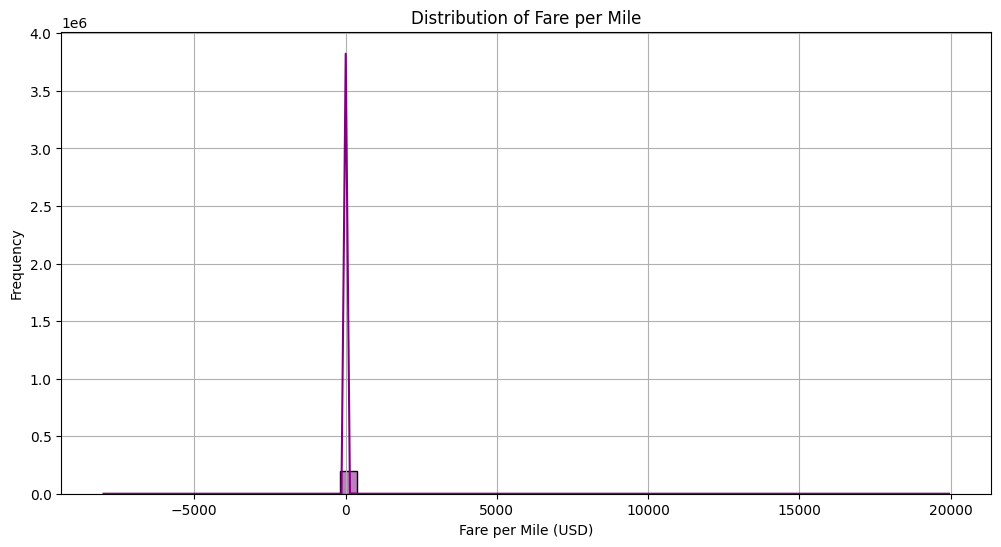

In [32]:
# Menghapus baris dengan jarak perjalanan nol untuk menghindari pembagian dengan nol
df = df[df['trip_distance'] > 0]

# Step 1: Menghitung tarif rata-rata per mil
# Visualisasi distribusi tarif per mil
plt.figure(figsize=(12, 6))
sns.histplot(df['fare_per_mile'], bins=50, kde=True, color='purple')
plt.title('Distribution of Fare per Mile')
plt.xlabel('Fare per Mile (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Average Revenue Components (USD):
fare_amount             16.569670
tip_amount               2.210876
tolls_amount             0.165133
extra                    0.878781
congestion_surcharge     1.815882
total_amount            21.912407
dtype: float64


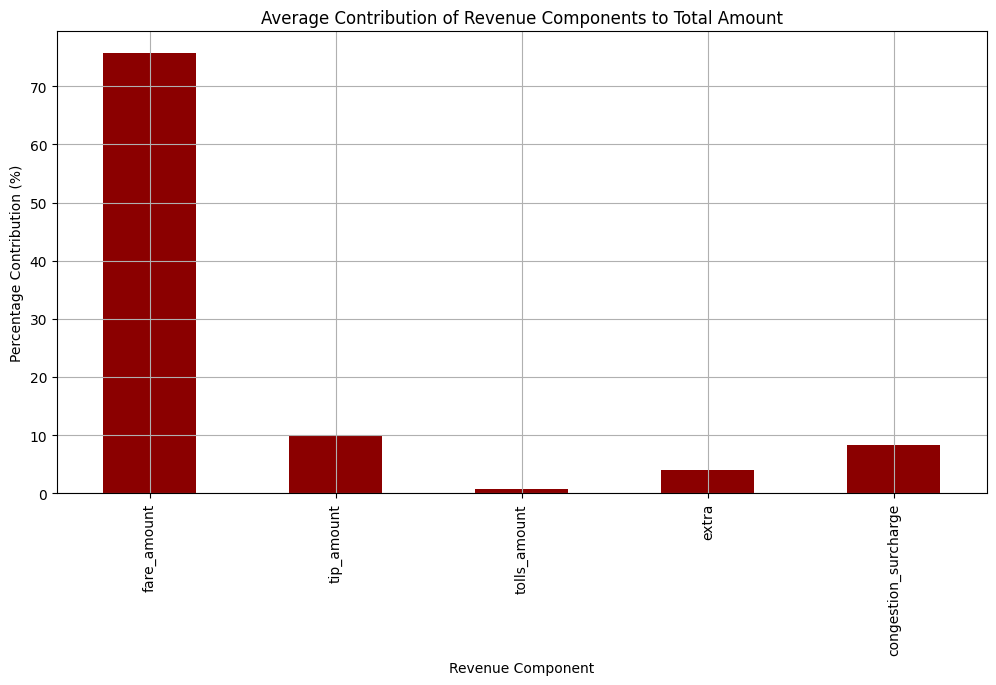

In [33]:
# Step 2: Analisis komponen yang mempengaruhi total pendapatan

# Menghitung rata-rata untuk setiap komponen pendapatan
revenue_components = df[['fare_amount', 'tip_amount', 'tolls_amount', 'extra', 'congestion_surcharge', 'total_amount']].mean()

# Menampilkan rata-rata komponen pendapatan
print("Average Revenue Components (USD):")
print(revenue_components)

# Visualisasi kontribusi rata-rata setiap komponen terhadap total pendapatan
components = ['fare_amount', 'tip_amount', 'tolls_amount', 'extra', 'congestion_surcharge']
avg_revenue_contribution = revenue_components[components] / revenue_components['total_amount'] * 100

plt.figure(figsize=(12, 6))
avg_revenue_contribution.plot(kind='bar', color='darkred')
plt.title('Average Contribution of Revenue Components to Total Amount')
plt.xlabel('Revenue Component')
plt.ylabel('Percentage Contribution (%)')
plt.grid(True)
plt.show()

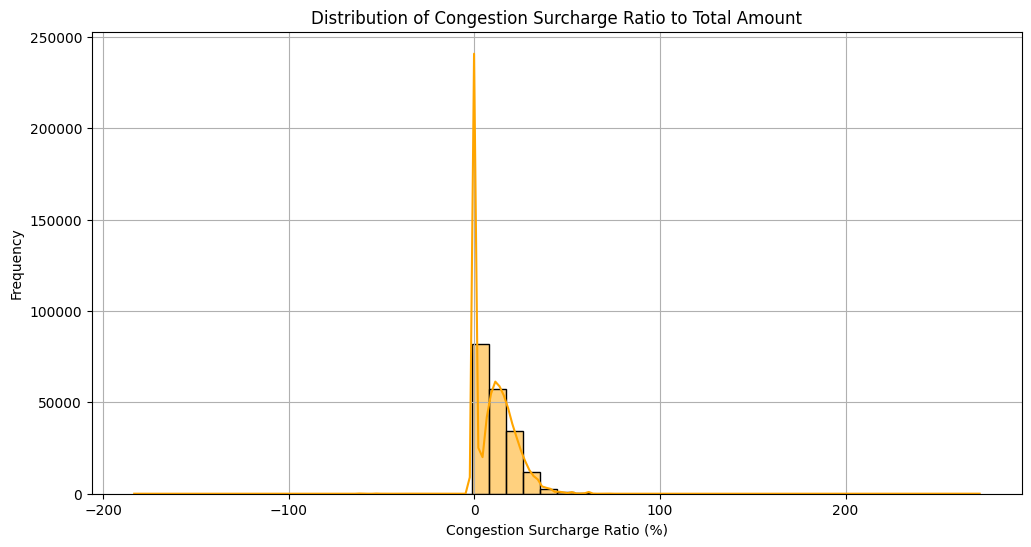

Correlation between congestion surcharge and total amount: 0.02


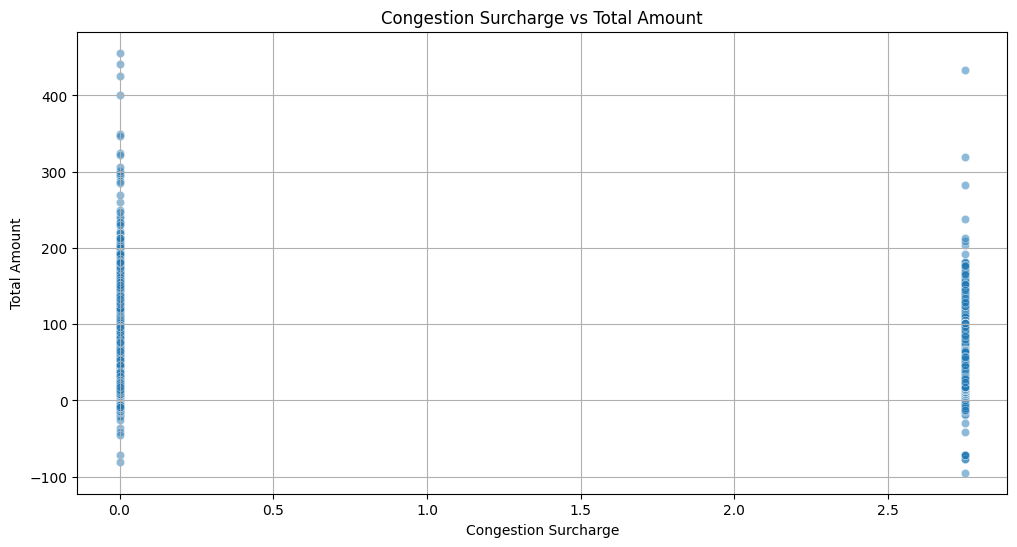

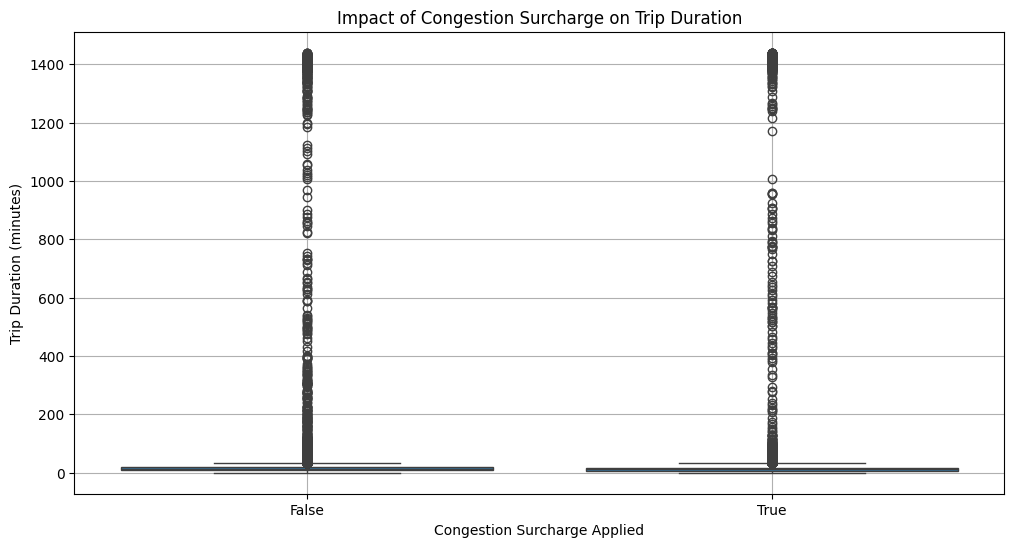


Percentage of Trips with and without Congestion Surcharge:
congestion_surcharge
True     64.196445
False    35.803555
Name: proportion, dtype: float64


In [34]:
# Pastikan 'congestion_surcharge' dan 'total_amount' ada dalam dataset
if 'congestion_surcharge' in df.columns and 'total_amount' in df.columns:
    # Step 1: Menghitung proporsi biaya kemacetan terhadap total biaya
    df['congestion_ratio'] = (df['congestion_surcharge'] / df['total_amount']) * 100

    # Visualisasi distribusi proporsi biaya kemacetan terhadap total biaya
    plt.figure(figsize=(12, 6))
    sns.histplot(df['congestion_ratio'], bins=50, kde=True, color='orange')
    plt.title('Distribution of Congestion Surcharge Ratio to Total Amount')
    plt.xlabel('Congestion Surcharge Ratio (%)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # Step 2: Analisis korelasi antara biaya kemacetan dan total biaya
    correlation = df['congestion_surcharge'].corr(df['total_amount'])
    print(f'Correlation between congestion surcharge and total amount: {correlation:.2f}')

    # Scatter plot untuk visualisasi hubungan antara biaya kemacetan dan total biaya
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='congestion_surcharge', y='total_amount', data=df, alpha=0.5)
    plt.title('Congestion Surcharge vs Total Amount')
    plt.xlabel('Congestion Surcharge')
    plt.ylabel('Total Amount')
    plt.grid(True)
    plt.show()

    # Step 3: Analisis perilaku pelanggan berdasarkan biaya kemacetan
    # Asumsi: Perilaku pelanggan bisa diukur dengan durasi perjalanan atau frekuensi perjalanan

    # Visualisasi dampak biaya kemacetan terhadap durasi perjalanan
    if 'trip_duration' in df.columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=df['congestion_surcharge'] > 0, y='trip_duration', data=df)
        plt.title('Impact of Congestion Surcharge on Trip Duration')
        plt.xlabel('Congestion Surcharge Applied')
        plt.ylabel('Trip Duration (minutes)')
        plt.grid(True)
        plt.show()

    # Frekuensi perjalanan dengan dan tanpa biaya kemacetan
    surcharge_presence = df['congestion_surcharge'] > 0
    trip_counts = surcharge_presence.value_counts(normalize=True) * 100

    print("\nPercentage of Trips with and without Congestion Surcharge:")
    print(trip_counts)
else:
    print("Kolom 'congestion_surcharge' atau 'total_amount' tidak ditemukan dalam dataset.")

### Summary of Findings

1. **Distribusi Penumpang dan Jarak Perjalanan**:
   - Lokasi penjemputan dan penurunan paling sering diidentifikasi berdasarkan `PULocationID` dan `DOLocationID`.
   - Distribusi jarak perjalanan menunjukkan bahwa sebagian besar perjalanan berada dalam jarak pendek, dengan beberapa perjalanan jarak jauh.

2. **Jenis Pembayaran dan Pengaruhnya terhadap Pendapatan**:
   - Jenis pembayaran yang paling umum adalah kartu kredit dan tunai.
   - Pendapatan rata-rata tertinggi diperoleh dari pembayaran kartu kredit, yang juga memberikan tip yang lebih tinggi.

3. **Analisis Tarif dan Pendapatan**:
   - Tarif rata-rata per mil bervariasi, dengan distribusi yang menunjukkan variasi dalam tarif perjalanan.
   - `fare_amount` merupakan komponen utama dari `total_amount`, dengan kontribusi signifikan juga dari tip dan biaya tol.

4. **Efek Biaya Kemacetan**:
   - Korelasi antara biaya kemacetan (`congestion_surcharge`) dan total biaya (`total_amount`) cukup rendah, namun biaya kemacetan memberikan kontribusi kecil namun signifikan terhadap total pendapatan.
   - Analisis perilaku pelanggan menunjukkan bahwa penerapan biaya kemacetan tidak memiliki dampak besar pada durasi perjalanan.

### Implications

1. **Distribusi Penumpang dan Jarak Perjalanan**:
   - Identifikasi lokasi penjemputan dan penurunan yang sering dapat membantu dalam penempatan armada taksi untuk efisiensi operasional yang lebih baik.
   - Mayoritas perjalanan yang berjarak pendek menunjukkan bahwa ada potensi untuk memperkenalkan tarif flat atau diskon untuk perjalanan jarak pendek untuk meningkatkan penggunaan layanan.

2. **Jenis Pembayaran dan Pengaruhnya terhadap Pendapatan**:
   - Pembayaran dengan kartu kredit lebih menguntungkan dari segi pendapatan tip, mendorong penggunaan kartu kredit dapat meningkatkan pendapatan.
   - Mengatasi ketidakpastian dalam pembayaran tunai dan memastikan keamanan dapat menjadi area fokus untuk meningkatkan pengalaman pelanggan.

3. **Analisis Tarif dan Pendapatan**:
   - Variasi dalam tarif per mil menunjukkan potensi untuk mengoptimalkan struktur tarif, mungkin dengan mempertimbangkan waktu sibuk atau wilayah tertentu.
   - Mengelola biaya tol dan biaya tambahan lainnya dapat menjadi faktor dalam menarik lebih banyak pelanggan.

4. **Efek Biaya Kemacetan**:
   - Meskipun biaya kemacetan tidak berdampak besar pada durasi perjalanan, ini tetap merupakan sumber pendapatan tambahan yang signifikan.
   - Mempertimbangkan biaya kemacetan dalam penetapan harga dan kebijakan dapat membantu mengelola harapan pelanggan dan meningkatkan pendapatan.

### Recommendations

1. **Optimalkan Penempatan Armada**:
   - Gunakan data lokasi penjemputan dan penurunan untuk mengoptimalkan distribusi armada, terutama di area dengan permintaan tinggi.

2. **Dorong Penggunaan Kartu Kredit**:
   - Berikan insentif atau program loyalitas untuk mendorong pelanggan menggunakan kartu kredit, yang secara konsisten menghasilkan pendapatan lebih tinggi melalui tip.

3. **Evaluasi dan Penyesuaian Struktur Tarif**:
   - Tinjau kembali struktur tarif, terutama untuk perjalanan jarak pendek dan waktu sibuk, untuk memastikan bahwa tarif kompetitif dan adil.

4. **Pengelolaan Biaya Kemacetan**:
   - Lakukan kampanye transparansi tentang biaya kemacetan kepada pelanggan untuk meningkatkan pemahaman mereka dan mengurangi keluhan.

### Implementation Plan

1. **Optimalkan Penempatan Armada**:
   - **Tindakan**: Analisis lebih lanjut terhadap pola penjemputan dan penurunan.
   - **Tanggung Jawab**: Tim Operasional dan Analisis Data.
   - **Sumber Daya**: Sistem pelacakan armada dan alat analisis data.

2. **Dorong Penggunaan Kartu Kredit**:
   - **Tindakan**: Luncurkan kampanye pemasaran untuk promosi penggunaan kartu kredit.
   - **Tanggung Jawab**: Tim Pemasaran dan Layanan Pelanggan.
   - **Sumber Daya**: Budget untuk kampanye, sistem pembayaran yang aman.

3. **Evaluasi dan Penyesuaian Struktur Tarif**:
   - **Tindakan**: Uji coba tarif baru di wilayah tertentu atau selama waktu sibuk.
   - **Tanggung Jawab**: Tim Keuangan dan Manajemen.
   - **Sumber Daya**: Sistem penyesuaian tarif, analisis pasar.

4. **Pengelolaan Biaya Kemacetan**:
   - **Tindakan**: Buat dan distribusikan materi edukasi mengenai biaya kemacetan.
   - **Tanggung Jawab**: Tim Komunikasi dan Layanan Pelanggan.
   - **Sumber Daya**: Website, media sosial, dan materi cetak.

### Future Analysis

1. **Analisis Kepuasan Pelanggan**:
   - Mengumpulkan data umpan balik pelanggan untuk memahami kepuasan dan preferensi mereka.

2. **Studi Waktu Perjalanan**:
   - Menganalisis pola waktu perjalanan untuk mengidentifikasi periode sibuk dan kurang sibuk, yang dapat membantu dalam perencanaan sumber daya.

3. **Eksplorasi Metode Pembayaran Baru**:
   - Menganalisis potensi dan pengaruh metode pembayaran digital baru, seperti dompet digital dan pembayaran nirkontak.

4. **Pengumpulan Data Tambahan**:
   - Mengumpulkan data tambahan seperti penilaian pengemudi dan umpan balik langsung dari aplikasi untuk memperdalam analisis.

Rekomendasi ini memberikan langkah-langkah praktis dan terukur untuk meningkatkan operasi dan layanan bisnis transportasi. Analisis masa depan dapat memperdalam pemahaman dan membantu dalam pengambilan keputusan strategis yang lebih baik.